# Imports

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'legend.frameon':True})
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from sklearn.exceptions import ConvergenceWarning
import warnings

# Loads

In [24]:
df = pd.read_csv('csv/train.csv', encoding = 'utf-8')

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
print('col,not_null,not_null_pc,unique')
for col in df.columns:
    msg = col
    not_null = df[df[col].isnull() == False]
    msg += ',%s,%s,%s'%(len(not_null), np.round(len(not_null) / len(df) * 100, 2), len(df[col].unique()))
    print(msg)

col,not_null,not_null_pc,unique
PassengerId,891,100.0,891
Survived,891,100.0,2
Pclass,891,100.0,3
Name,891,100.0,891
Sex,891,100.0,2
Age,714,80.13,89
SibSp,891,100.0,7
Parch,891,100.0,7
Ticket,891,100.0,681
Fare,891,100.0,248
Cabin,204,22.9,148
Embarked,889,99.78,4


# Deal with missing

## Fill Age NaN

    Use median of group by PClass and Sex to fill empty age

In [27]:
def missing_ages(df):
    for groups in df.drop(df[df['Age'].isnull()].index).groupby(['Pclass', 'Sex'])['Age'].median().items():
        for rows in df[df['Age'].isnull()].iterrows():
            if rows[1]['Pclass'] == groups[0][0] and rows[1]['Sex'] == groups[0][1]:
                df.loc[rows[0], 'Age'] = groups[1]

missing_ages(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop Embarked missing

In [28]:
df = df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


# Extract Title

In [29]:
df['Title'] = df['Name'].apply(lambda x: str(x).split('.')[0].split(' ')[-1])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Create Family

In [30]:
df['family'] = df['SibSp'] + df['Parch']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
family         889 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


# Band continuous

In [31]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df['FareBand'] = pd.cut(df['Fare'], 5)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
family         889 non-null int64
AgeBand        889 non-null category
FareBand       889 non-null category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 106.4+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(16.336, 32.252]","(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,"(32.252, 48.168]","(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,"(16.336, 32.252]","(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,"(32.252, 48.168]","(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,"(32.252, 48.168]","(-0.512, 102.466]"


# Encode Categorical

In [32]:
for col in ['Sex', 'Embarked', 'Title', 'AgeBand', 'FareBand']:
    df[col] = pd.Categorical(df[col]).codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null int8
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null int8
Title          889 non-null int8
family         889 non-null int64
AgeBand        889 non-null int8
FareBand       889 non-null int8
dtypes: float64(2), int64(6), int8(5), object(3)
memory usage: 87.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,12,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,13,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,9,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,13,1,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,12,0,2,0


# Select

    Drop :
        - PassengerId : Just an id, no value for prediction
        - Name : Useless without parsing, use Title
        - Ticket : It's like an id, maybe with more work we can determine position on the boat for each passenger
        - Cabin : Same as Ticket        

In [33]:
features = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int8
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int8
Title       889 non-null int8
family      889 non-null int64
AgeBand     889 non-null int8
FareBand    889 non-null int8
dtypes: float64(2), int64(5), int8(5)
memory usage: 59.9 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family,AgeBand,FareBand
0,0,3,1,22.0,1,0,7.2500,2,12,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,13,1,2,0
2,1,3,0,26.0,0,0,7.9250,2,9,0,1,0
3,1,1,0,35.0,1,0,53.1000,2,13,1,2,0
4,0,3,1,35.0,0,0,8.0500,2,12,0,2,0


# Correlation

C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


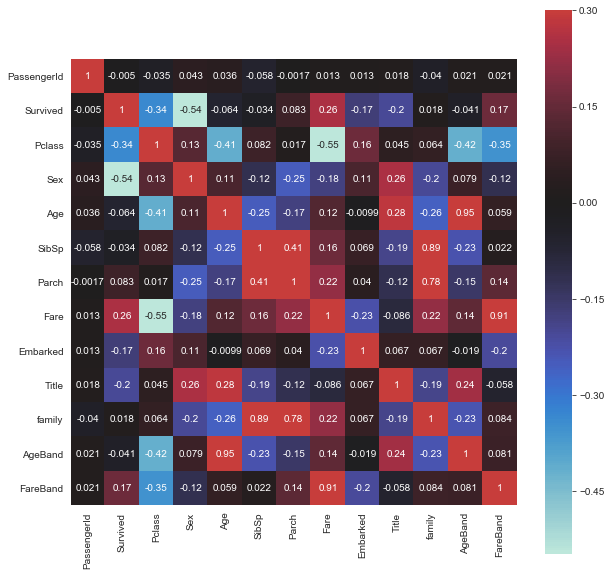

In [34]:
corr = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)

# Linear Regression 

In [35]:
def lin_model(df): 
    print('******* Splits lengths *******')
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size = 0.2, random_state=5)
    print('train length : %s, test length : %s'%(len(X_train), len(X_test)))
    print('******************************')
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    print('coef : %s'%reg.coef_)
    print('ms_error : %s'%mean_squared_error(y_test, y_pred))
    print('r2 : %s'%r2_score(y_test, y_pred))
    
    to_plot = pd.DataFrame([[y_test.to_numpy()[i], y_pred[i]] for i in range(len(y_test))], columns = ['test', 'pred'])
    to_plot = to_plot.sort_values('test')
    
    plt.plot(list(range(len(to_plot))), to_plot['test'])
    plt.plot(list(range(len(to_plot))), to_plot['pred'])
    
    print('******************************')
    return reg

******* Splits lengths *******
train length : 711, test length : 178
******************************
coef : [-1.57527864e-01 -4.55856396e-01 -5.76059824e-03 -2.57101596e-02
 -4.49160489e-04  2.29782924e-03 -3.48935313e-02 -1.23082373e-02
 -2.61593201e-02 -1.00719606e-02 -2.33108140e-01]
ms_error : 0.11942652953651617
r2 : 0.4610582307598664
******************************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

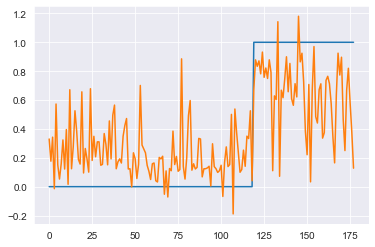

In [36]:
lin_model(features)

    We can see prediction as no accury with linear regression model

# Logisitic Regression

    I decide the best way to choose features it's to try all combination

In [37]:
import itertools
def bruteforce(df):
    features = df.drop(['Survived'], axis=1)
    target = df['Survived']
    
    combs = []
    for i in range(2, len(features.columns)):
        for comb in itertools.combinations(features, i):
            combs.append(comb)
    rows = []
    for i in range(len(combs)):
        X_train, X_test, y_train, y_test = train_test_split(features[list(combs[i])], target, test_size = 0.2, random_state=5)
        clf = LogisticRegression(solver='lbfgs')
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        M = confusion_matrix(y_test, pred)
        rows.append([combs[i], clf.score(X_test, y_test), roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), M[0,1], M[1,0]])
        clear_output(wait=True)
        print('%s/%s - %s'%(i+1, len(combs), (i+1)/len(combs)*100))
    print('End bruteforce model')
    return rows

In [38]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
result = pd.DataFrame(bruteforce(features), columns=['comb', 'score', 'auc', 'fp', 'fn'])
warnings.resetwarnings()

2035/2035 - 100.0
End bruteforce model


## Best models ?

    comb : features use by model
    score : the mean accuracy on the given test data and labels.
    auc : AUC ROC score for the model (use survived == 1 probability)
    fp : False positif
    fn : False negatif

In [39]:
max_score = result[result['score'] == result['score'].max()]
max_score

,comb,score,auc,fp,fn
1492,"(Pclass, Sex, Age, SibSp, Fare, Embarked, Fare...",0.876404,0.888050,9,13
1876,"(Pclass, Sex, SibSp, Fare, Embarked, Title, fa...",0.876404,0.875516,10,12


In [40]:
max_auc = result[result['auc'] == result['auc'].max()]
max_auc

,comb,score,auc,fp,fn
1016,"(Pclass, Sex, Age, SibSp, Parch, AgeBand)",0.853933,0.891753,11,15
